In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.special import erf
from colorplot import load_mags, color_cut, make_colorplot, plot_selection
from my_functions import *
from LumFunc_miniJPAS import LumFunc_hist, LumFunc

In [2]:
cat = load_noflag_cat('pkl/catalogDual_pz.pkl')
ftags = load_filter_tags()

### Probabilistic approach
Assuming gaussian error (valid up to SNR ~ 5):

$P(\mathrm{BB})=\mathcal{N}(\mathrm{BB},\,\sigma_\mathrm{BB}^2)\\
P(\mathrm{NB})=\mathcal{N}(\mathrm{NB},\,\sigma_\mathrm{NB}^2)$

Line excess: $\mathrm{BB} - \mathrm{NB}$, then

$P(\mathrm{BB}-\mathrm{NB})=\mathcal{N}(\mathrm{BB}-\mathrm{NB},\,\sigma_\mathrm{BB}^2+\sigma_\mathrm{NB}^2)$

The probability of an emission line is:

$P(\mathrm{line})=\int_{\mathrm{EW}_0=30\,\unicode{x212B}}^{\infty}\mathcal{N}(\mathrm{BB}-\mathrm{NB},\,\sigma_\mathrm{BB}^2+\sigma_\mathrm{NB}^2)
=\frac{1}{2}-\frac{1}{2}\cdot\mathrm{erf}\left(\frac{m_{\mathrm{EW}_0=30\,\unicode{x212B}}-(\mathrm{BB}-\mathrm{NB})}{\sqrt{2}(\sigma_\mathrm{BB}^2+\sigma_\mathrm{NB}^2)}\right)$

J0460


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


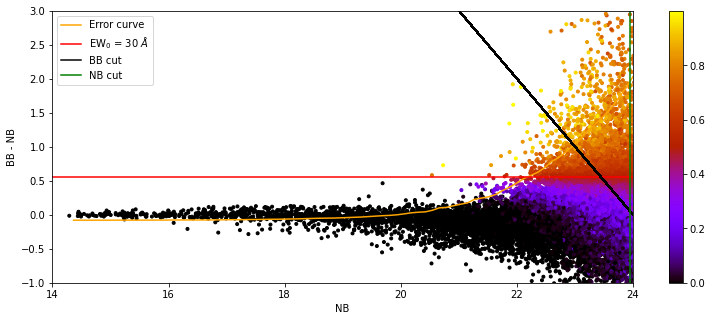

J0470


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


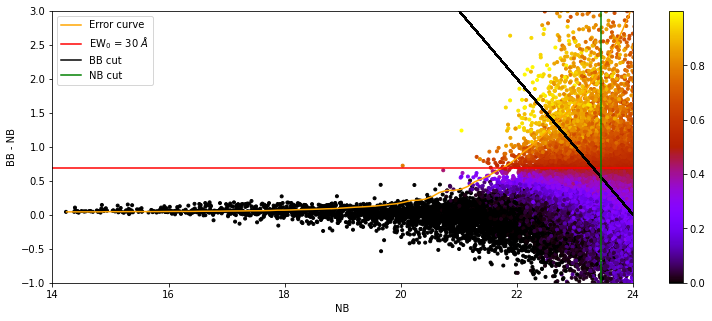

J0480


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


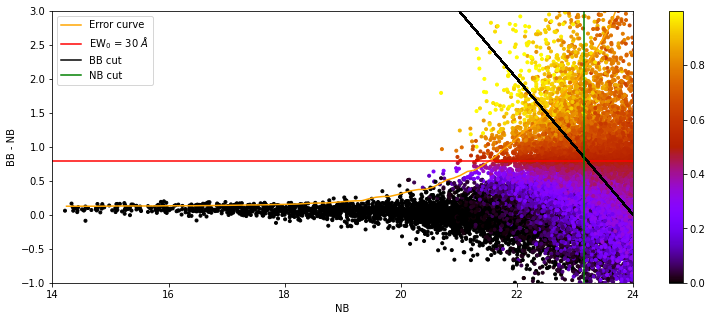

J0490


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


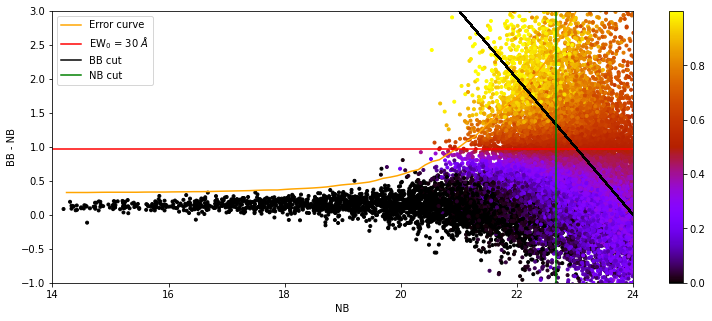

J0500


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


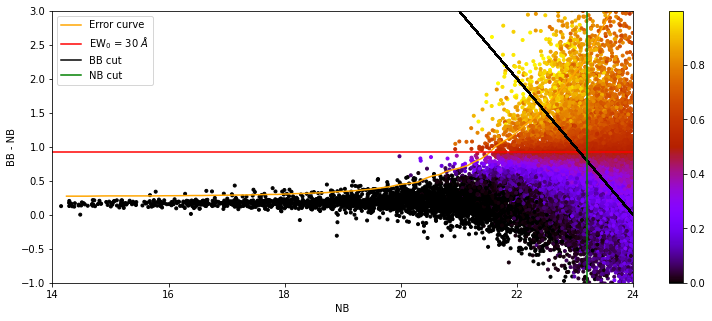

In [3]:
for nb_ind in [9, 10, 11, 12, 13]:
#     nb_ind = 8 # J0480
    print(ftags[nb_ind])
    bb_ind = -3
    nb_m, bb_m, nb_e, bb_e, bbcut, nbcut = load_mags(nb_ind, bb_ind)

    mu = bb_m - nb_m
    sigma = np.sqrt(bb_e**2 + nb_e**2)
    m_ew = color_cut(30, nb_ind) + np.nanmedian(mu)
    p_line = 0.5 - 0.5*erf((m_ew - mu) / (np.sqrt(2)*sigma))

    make_colorplot(cat, bb_ind, nb_ind, [], 'NB', False, p_line, True)

J0460
3


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


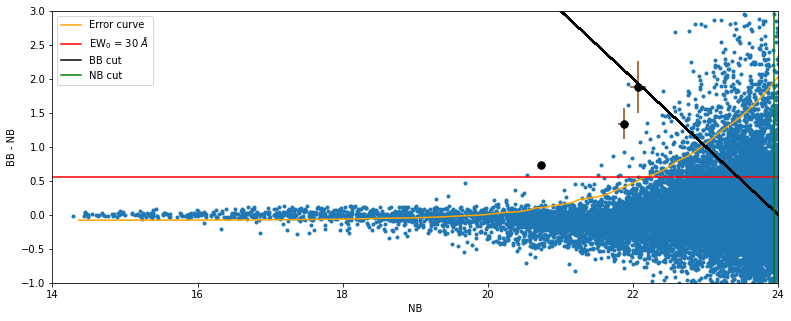

J0470
1


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


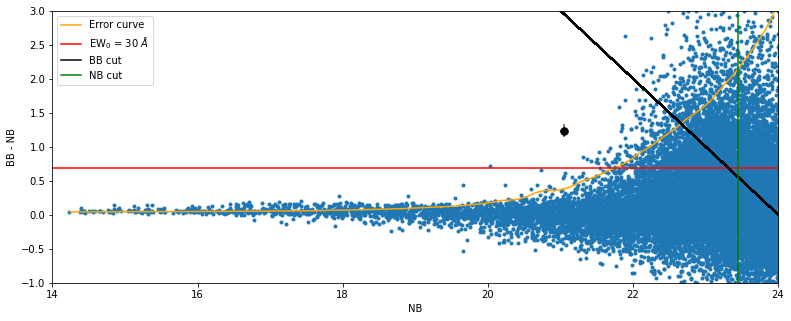

J0480
7


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


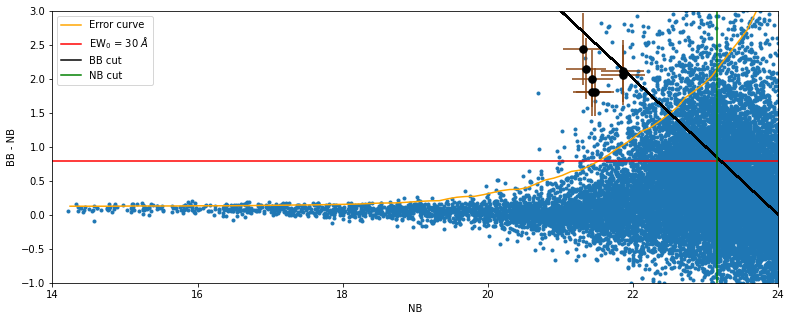

J0490
4


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


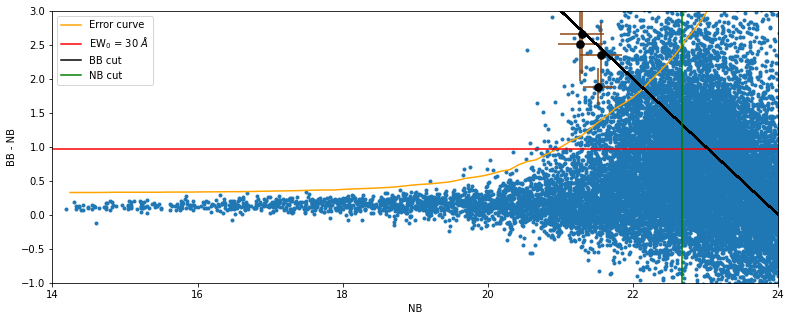

J0500
0


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


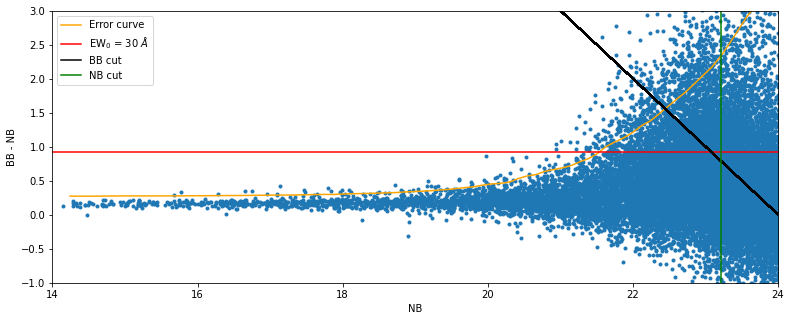

J0510
2


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


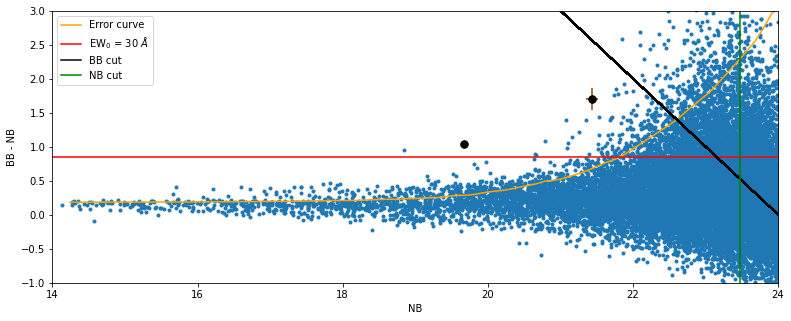

J0520
2


/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


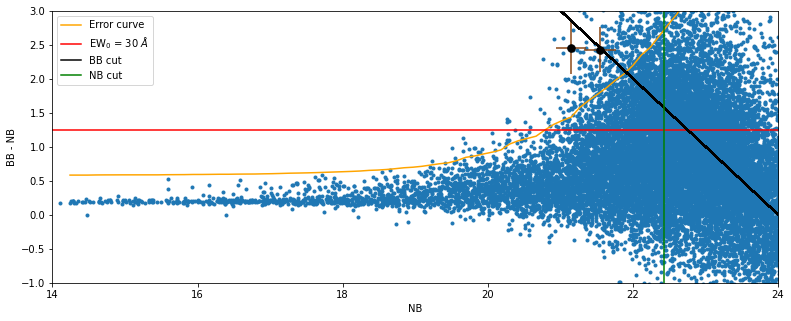

In [4]:
for nb_ind in [9, 10, 11, 12, 13, 14, 15]:
#     nb_ind = 8 # J0480
    print(ftags[nb_ind])
    bb_ind = -3
    nb_m, bb_m, nb_e, bb_e, bbcut, nbcut = load_mags(nb_ind, bb_ind)
    
    min_score = 3

    mu = bb_m - nb_m
    sigma = np.sqrt(bb_e**2 + nb_e**2)
    m_ew = color_cut(30, nb_ind) + np.nanmedian(mu)
    p_line = 0.5 - 0.5*erf((m_ew - mu) / (np.sqrt(2)*sigma))
    selection, = np.where((p_line > erf(min_score/np.sqrt(2))) & (nb_m < nbcut) & (bb_m < bbcut))
    print(selection.shape[0])
    make_colorplot(cat, bb_ind, nb_ind, selection, 'NB', False)

In [5]:
filename = 'selected_sources/src'

mask_fzero = (cat['MAG'][:,nb_ind] < 90) & (cat['MAG'][:,bb_ind] < 90)
masked_mags = cat['MAG'][mask_fzero, :]
masked_errs = cat['ERR'][mask_fzero, :]

# plot_selection(selection, nb_ind, filename, masked_mags, masked_errs)

## Cumulative LumFunc

In [6]:
## Load HETDEX LumFunc data (Zhang 2021)
filepath = 'csv/HETDEX_LumFunc.csv'
HETDEX_LF = []
with open(filepath, mode='r') as csvfile:
    rdlns = csv.reader(csvfile, delimiter=',')
    for line in rdlns:
        HETDEX_LF.append(line)
HETDEX_LF = np.array(HETDEX_LF).astype(float)

In [9]:
nb_ind_arr = [9,10,11,12,13,14,15]
hist_arr = []
volume_arr = []

for nb_ind in nb_ind_arr:
#     nb_ind = 11 # J0480
    bb_ind = -3
    nb_m, bb_m, nb_e, bb_e, bbcut, nbcut = load_mags(nb_ind, bb_ind)

    mu = bb_m - nb_m
    sigma = np.sqrt(bb_e**2 + nb_e**2)
    m_ew = color_cut(30, nb_ind) + np.nanmedian(mu)
    
    min_score = 2 # sigma

    p_line = 0.5 - 0.5*erf((m_ew - mu) / (np.sqrt(2)*sigma))
    selection, = np.where((p_line > erf(min_score/np.sqrt(2))) & (nb_m < nbcut) & (bb_m < bbcut))
    
    w_pivot = central_wavelength(load_tcurves(load_filter_tags()))[nb_ind]
    w_pivot_bb = central_wavelength(load_tcurves(load_filter_tags()))[bb_ind]
    w_fwhm = nb_fwhm(load_tcurves(load_filter_tags()), nb_ind, True)
    f_line = mag_to_flux(nb_m[selection], w_pivot) - mag_to_flux(bb_m[selection], w_pivot_bb)
    n_bins = 10

    x, hist, volume, bin_width = LumFunc_hist(f_line, w_pivot, w_fwhm, n_bins, 43.5, 44.5)
    hist_arr.append(hist)
    volume_arr.append(volume)

[3, 5, 0, 3, 0, 0, 1, 0, 0, 0]
[1, 2, 4, 2, 0, 0, 1, 0, 0, 0]
[0, 1, 13, 12, 15, 6, 3, 0, 1, 0]
[0, 0, 4, 16, 25, 25, 13, 5, 2, 1]
[0, 0, 5, 9, 6, 2, 0, 0, 0, 0]
[0, 0, 2, 2, 3, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 7, 9, 19, 8, 4, 1]


[ 4  8 28 44 56 43 37 13  7  2]


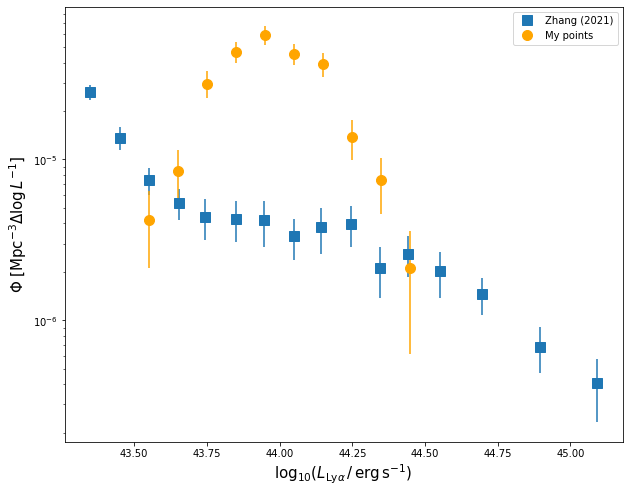

In [10]:
y = np.sum(hist_arr, axis = 0)/np.sum(volume_arr)/bin_width
errors = np.sqrt(np.sum(hist_arr, axis = 0))/np.sum(volume_arr)/bin_width
print(np.sum(hist_arr, axis = 0))

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(HETDEX_LF[:,0], HETDEX_LF[:,1], 's', markersize = 10, label = 'Zhang (2021)')
ax.errorbar(HETDEX_LF[:,0], HETDEX_LF[:,1], yerr = HETDEX_LF[:,2] - HETDEX_LF[:,1], fmt = 'none')

ax.plot(x, y, '.', markersize=20, c='orange', label = 'My points')
ax.errorbar(x, y, yerr = errors, fmt = 'none', c='orange')

ax.set_yscale('log')
ax.set_ylabel(r'$\Phi$ [Mpc$^{-3}\Delta\log L^{-1}$]', size=15)
ax.set_xlabel(r'$\log_{10}(L_{\mathrm{Ly}\alpha}\,/\,\mathrm{erg}\,\mathrm{s}^{-1})$', size=15)
ax.legend()
plt.show()